# Fault Detection with VAR Models

### Plot the dataset
##### I want to fix the model problem to predict the other attributes

In [3]:
print(pd.__version__)

2.2.0


In [1]:
# Importing packages and libraries
from pandas import read_csv
import pandas as pd
import numpy as np
import pickle
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [2]:
def plot_multiple_series(actual, pred, attr):
    
    for i in range(len(attr)):
        title = "Prediction of {}".format(attr[i])
        plt.title(title)
        plt.xlabel("Timestep")
        plt.ylabel("Values")
        plt.plot(actual.iloc[:,i], label="actual")
        plt.plot(pred.iloc[:,i], label="forecast")
        plt.legend()
        plt.show()
#     return



In [3]:
def root_mse(x, y):
    if len(x) != len(y):
        return "Error: The two arguments must have the same length"
    mse = np.square(np.subtract(x, y)).mean()
    return np.sqrt(mse)



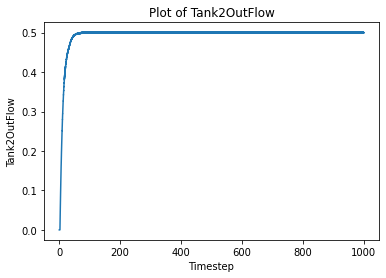

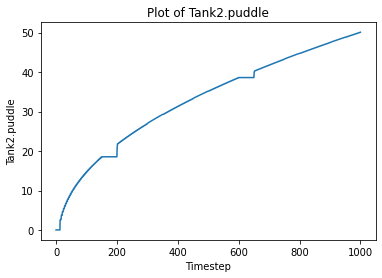

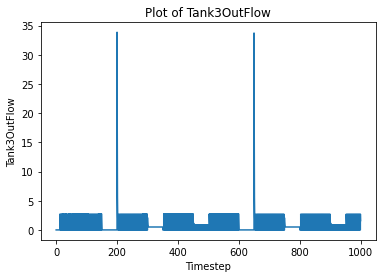

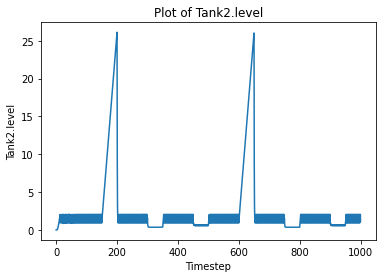

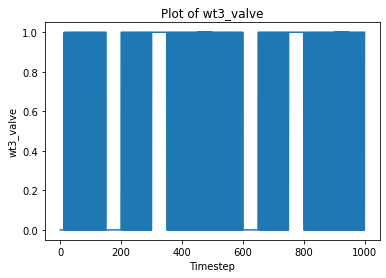

In [4]:
def plot_series(series, attr):
    for i in range(len(attr)):
        title = "Plot of "+str(attr[i])
        actual = series.iloc[:,i]
        plt.title(title)
        plt.xlabel("Timestep")
        plt.ylabel(attr[i])
        plt.plot(actual)
        plt.show()
        
file = 'test_series_reduced.csv'
df_raw = read_csv(file, header=0, index_col=0)
attr = list(pd.read_csv(file).columns.values)[1:]        
series = df_raw.iloc[:40000,:]
plot_series(series, attr)

### Normalisation of the golden dataset
##### This is to obtain the mean and standard deviation that would be used for normalising all the datasets

In [5]:
def normalise_timeseries(data):
    # Calculate the mean and standard deviation for each feature
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    
    # Normalise each feature using standard deviation
    normalised_data = (data - means) / stds
    return pd.DataFrame(normalised_data)



def denormalise_timeseries(data, means, stds):
    denormalised_data = (data * stds) + means
    return pd.DataFrame(denormalised_data)



normalised_data = normalise_timeseries(df_raw)

In [6]:
testData = normalised_data
testData

,Tank2OutFlow,Tank2.puddle,Tank3OutFlow,Tank2.level,wt3_valve
time,,,,,
0.00,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.05,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.10,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.15,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.20,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
...,...,...,...,...,...
999.80,0.126510,1.389939,1.245761,-0.249446,1.428978
999.85,0.133595,1.390251,1.179017,-0.262224,1.428978
999.90,0.169767,1.390697,1.085672,-0.280094,1.428978


In [7]:
# Train Test Split
nobs = 3000
# train = df[:-nobs]
train = testData.iloc[:-nobs]
test = testData.iloc[-nobs:]
len(train), len(test)

(17001, 3000)

### Load the saved models

In [9]:
# The saved models are loaded to reconstruct the VAR
attr = list(pd.read_csv('waterTank_Golden_reduced.csv').columns.values)[1:]
with open('var_golden_model_reduced.pkl', 'rb') as f:
    golden_model = pickle.load(f)

with open('var_ctrl_valueFlip_perm_reduced.pkl', 'rb') as vf:
    valueFlip_model = pickle.load(vf)    

with open('var_ctrl_stuckat0_perm_reduced.pkl', 'rb') as stuck0:
    stuckat0_model = pickle.load(stuck0)    

with open('var_ctrl_stuckat1_perm_reduced.pkl', 'rb') as stuck1:
    stuckat1_model = pickle.load(stuck1)



FileNotFoundError: [Errno 2] No such file or directory: 'var_ctrl_valueFlip_perm_reduced.pkl'

In [ ]:

# golden_model = VAR.load('var_golden_model.pkl')

# Retrieve the lag order
lag_order = golden_model.k_ar
# lag_order = 19

# Prepare new data
# newData = pd.read_csv('waterTank_Golden.csv', index_col=0, header=0, parse_dates=True)
# newData = newData[attr]
# newData = newData[-lag_order:]
# newData = newData[:200,:]

# Initialise the VAR model
model_input = train.values
# model_input = newData.values
# golden_model.initialize_known(model_input)

# Make predictions
predictions = golden_model.forecast(model_input, steps=5)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=train.columns)

print(predictions_df)


In [ ]:
test

### Plot the input signals

In [ ]:
def plot_multiple_series(actual, pred, attr):
    if len(actual) != len(pred):
        return "Error: The lengths of the two data must be the same!"
    x = range(len(pred))
    for i in range(len(attr)):
        title = "Prediction of {}".format(attr[i])
        plt.title(title)
        plt.xlabel("Timestep")
        plt.ylabel("Values")
        plt.plot(x, actual.iloc[:,i], label="actual")
        plt.plot(x, pred.iloc[:,i], label="forecast")
        plt.legend()
        plt.show()
#     return


In [ ]:
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)

In [ ]:
## SPecify the signal range of the golden data
begin = 2000
finish = 2200
input1 = testData.iloc[begin:finish,:]

## Visualise the input signals
plot_series(input1,attr)

# attr = list(pd.read_csv('test_series.csv').columns.values)[1:]
# for i in range(len(attr)):
#     title = "Input of {}".format(attr[i])
#     plt.title(title)
#     plt.xlabel("Timesteps")
#     plt.ylabel("Normalised values")
#     plt.plot(input1.iloc[:,i])
#     plt.show()

### Predict with the pretrained models (Golden data)
#### Golden model

In [ ]:
steps = 15
predictions = golden_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=input1.columns)

print(predictions_df)

In [ ]:
# plot_series(predictions_df, attr)
expected = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected, predictions_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected = expected.reset_index(drop=True)
RMSE_golden = []
for feat in attr:
    RMSE_golden.append(root_mse(predictions_df[feat], expected[feat]))
print(RMSE_golden)

#### ValueFlip

In [ ]:
steps = 15
pred_valueFlip = valueFlip_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
pred_valueFlip_df = pd.DataFrame(pred_valueFlip, columns=input1.columns)

# plot_series(predictions_df, attr)
expected_valueFlip = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected_valueFlip, pred_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected_valueFlip = expected_valueFlip.reset_index(drop=True)
RMSE_vf = []
for feat in attr:
    RMSE_vf.append(root_mse(pred_valueFlip_df[feat], expected_valueFlip[feat]))
print(RMSE_vf)

### Stuck at zero

In [ ]:
steps = 15
pred_stuckat0 = stuckat0_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
pred_stuckat0_df = pd.DataFrame(pred_stuckat0, columns=input1.columns)

# plot_series(predictions_df, attr)
expected_stuckat0 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected_stuckat0, pred_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected_stuckat0 = expected_stuckat0.reset_index(drop=True)
RMSE_s0 = []
for feat in attr:
    RMSE_s0.append(root_mse(pred_stuckat0_df[feat], expected_stuckat0[feat]))

# tested = root_mse(df['Tank1WaterLevel'].iloc[:steps], df_forecast['Tank1WaterLevel'])
# tested
print(RMSE_s0)

### stuckat one

In [ ]:
steps = 15
pred_stuckat1 = stuckat1_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
pred_stuckat1_df = pd.DataFrame(pred_stuckat1, columns=input1.columns)
pred_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected_stuckat1 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected_stuckat1, pred_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
# pred_stuckat1_df["Tank1WaterLevel"]
pred_stuckat1_df

In [ ]:
expected_stuckat1 = expected_stuckat1.reset_index(drop=True)
RMSE_s1 = []
for feat in attr:
    RMSE_s1.append(root_mse(pred_stuckat1_df[feat], expected_stuckat1[feat]))

print(RMSE_s1)

### Predict with the pretrained models (Stuckat0 faults data)
#### Golden model

In [ ]:
## SPecify the signal range
begin2 = 3000
finish2 = 3990
input2 = testData.iloc[begin2:finish2,:]

## Visualise the input signals
plot_series(input2,attr)

In [ ]:
steps = 50
predictions2 = golden_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
predictions2_df = pd.DataFrame(predictions2, columns=input2.columns)

# plot_series(predictions_df, attr)
expected2 = testData.iloc[finish2:finish2+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2, predictions2_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected2 = expected2.reset_index(drop=True)
RMSE2_golden = []
for feat in attr:
    RMSE2_golden.append(root_mse(predictions2_df[feat], expected2[feat]))
print(RMSE2_golden)

#### ValueFlip

In [ ]:
steps = 50
pred2_valueFlip = valueFlip_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
pred2_valueFlip_df = pd.DataFrame(pred2_valueFlip, columns=input2.columns)

# plot_series(predictions_df, attr)
expected2_valueFlip = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2_valueFlip, pred2_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected2_valueFlip = expected2_valueFlip.reset_index(drop=True)
RMSE2_vf = []
for feat in attr:
    RMSE2_vf.append(root_mse(pred2_valueFlip_df[feat], expected2_valueFlip[feat]))
print(RMSE2_vf)

### Stuck at zero

In [ ]:
steps = 50
pred2_stuckat0 = stuckat0_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
pred2_stuckat0_df = pd.DataFrame(pred2_stuckat0, columns=input2.columns)

# plot_series(predictions_df, attr)
expected2_stuckat0 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2_stuckat0, pred2_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected2_stuckat0 = expected2_stuckat0.reset_index(drop=True)
RMSE2_s0 = []
for feat in attr:
    RMSE2_s0.append(root_mse(pred2_stuckat0_df[feat], expected2_stuckat0[feat]))

print(RMSE2_s0)

### stuckat one

In [ ]:
steps = 50
pred2_stuckat1 = stuckat1_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
pred2_stuckat1_df = pd.DataFrame(pred2_stuckat1, columns=input2.columns)
pred2_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected2_stuckat1 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2_stuckat1, pred2_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected2_stuckat1 = expected2_stuckat1.reset_index(drop=True)
RMSE2_s1 = []
for feat in attr:
    RMSE2_s1.append(root_mse(pred2_stuckat1_df[feat], expected2_stuckat1[feat]))

print(RMSE2_s1)

### Predict with the pretrained models (Stuckat1 fault data)
#### Golden model

In [ ]:
## SPecify the signal range
begin3 = 6000
finish3 = 6990
input3 = testData.iloc[begin3:finish3,:]

## Visualise the input signals
plot_series(input3,attr)

In [ ]:
steps = 50
predictions3 = golden_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
predictions3_df = pd.DataFrame(predictions3, columns=input3.columns)

# plot_series(predictions_df, attr)
expected3 = testData.iloc[finish3:finish3+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3, predictions3_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected3 = expected3.reset_index(drop=True)
RMSE3_golden = []
for feat in attr:
    RMSE3_golden.append(root_mse(predictions3_df[feat], expected3[feat]))
print(RMSE3_golden)

#### ValueFlip

In [ ]:
steps = 50
pred3_valueFlip = valueFlip_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
pred3_valueFlip_df = pd.DataFrame(pred3_valueFlip, columns=input3.columns)

# plot_series(predictions_df, attr)
expected3_valueFlip = testData.iloc[finish3:finish3 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3_valueFlip, pred3_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected3_valueFlip = expected3_valueFlip.reset_index(drop=True)
RMSE3_vf = []
for feat in attr:
    RMSE3_vf.append(root_mse(pred3_valueFlip_df[feat], expected3_valueFlip[feat]))
print(RMSE3_vf)

### Stuck at zero

In [ ]:
steps = 50
pred3_stuckat0 = stuckat0_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
pred3_stuckat0_df = pd.DataFrame(pred3_stuckat0, columns=input3.columns)

# plot_series(predictions_df, attr)
expected3_stuckat0 = testData.iloc[finish3:finish3 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3_stuckat0, pred3_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected3_stuckat0 = expected3_stuckat0.reset_index(drop=True)
RMSE3_s0 = []
for feat in attr:
    RMSE3_s0.append(root_mse(pred3_stuckat0_df[feat], expected3_stuckat0[feat]))

print(RMSE3_s0)

### stuckat one

In [ ]:
steps = 50
pred3_stuckat1 = stuckat1_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
pred3_stuckat1_df = pd.DataFrame(pred3_stuckat1, columns=input3.columns)
pred3_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected3_stuckat1 = testData.iloc[finish3:finish3 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3_stuckat1, pred3_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected3_stuckat1 = expected3_stuckat1.reset_index(drop=True)
RMSE3_s1 = []
for feat in attr:
    RMSE3_s1.append(root_mse(pred3_stuckat1_df[feat], expected3_stuckat1[feat]))

print(RMSE3_s1)

### Predict with the pretrained models (ValueFlip fault data)
#### Golden model

In [ ]:
## SPecify the signal range
begin4 = 9000
finish4 = 9980
input4 = testData.iloc[begin4:finish4,:]

## Visualise the input signals
plot_series(input4,attr)

In [ ]:
steps = 50
predictions4 = golden_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
predictions4_df = pd.DataFrame(predictions4, columns=input4.columns)

# plot_series(predictions_df, attr)
expected4 = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4, predictions4_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected4 = expected4.reset_index(drop=True)
RMSE4_golden = []
for feat in attr:
    RMSE4_golden.append(root_mse(predictions4_df[feat], expected4[feat]))
print(RMSE4_golden)

#### ValueFlip

In [ ]:
steps = 50
pred4_valueFlip = valueFlip_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
pred4_valueFlip_df = pd.DataFrame(pred4_valueFlip, columns=input4.columns)

# plot_series(predictions_df, attr)
expected4_valueFlip = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4_valueFlip, pred4_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected4_valueFlip = expected4_valueFlip.reset_index(drop=True)
RMSE4_vf = []
for feat in attr:
    RMSE4_vf.append(root_mse(pred4_valueFlip_df[feat], expected4_valueFlip[feat]))
print(RMSE4_vf)

### Stuck at zero

In [ ]:
steps = 50
pred4_stuckat0 = stuckat0_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
pred4_stuckat0_df = pd.DataFrame(pred4_stuckat0, columns=input4.columns)

# plot_series(predictions_df, attr)
expected4_stuckat0 = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4_stuckat0, pred4_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected4_stuckat0 = expected4_stuckat0.reset_index(drop=True)
RMSE4_s0 = []
for feat in attr:
    RMSE4_s0.append(root_mse(pred4_stuckat0_df[feat], expected4_stuckat0[feat]))

print(RMSE4_s0)

### stuckat one

In [ ]:
steps = 50
pred4_stuckat1 = stuckat1_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
pred4_stuckat1_df = pd.DataFrame(pred4_stuckat1, columns=input4.columns)
pred4_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected4_stuckat1 = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4_stuckat1, pred4_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [ ]:
expected4_stuckat1 = expected4_stuckat1.reset_index(drop=True)
RMSE4_s1 = []
for feat in attr:
    RMSE4_s1.append(root_mse(pred4_stuckat1_df[feat], expected4_stuckat1[feat]))

print(RMSE4_s1)

### End of the Notebook